# Lab: Classification for Prosper Loan Dataset

We are going to classify the prosper loan dataset.  This dataset shows a history of loans made by Prosper.

In [1]:
%matplotlib inline
import time,datetime
import pandas as pd
import matplotlib.pyplot as plt

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf


In [2]:
# Install the package for running tensorboard on google colaboration
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False

print ("Running in Google COLAB : ", IN_COLAB)

Running in Google COLAB :  False


## Step 1: Load the Data

Notice we are first loading this into a Pandas dataframe. This is fine for a small dataset, but we will need more than this for a large "at scale" notebook.

In [3]:
## small file, start with this
#datafile = "https://s3.amazonaws.com/elephantscale-public/data/prosper-loan/prosper-loan-data-sample.csv"

## this is a large file
datafile = "/data/prosper-loan/prosper-loan-data.csv.gz"
# datafile = "https://s3.amazonaws.com/elephantscale-public/data/prosper-loan/prosper-loan-data.csv.gz"


data = pd.read_csv(datafile)
data

,Term,LoanStatus,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,...,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearsWithCredit
0,36,1,0.1580,4.0,6.0,Unknown,CO,Self-employed,2.0,True,...,0.0,0.0,0.00,9425,330.43,0,0,0.0,258,13
1,36,1,0.1325,4.0,6.0,Unknown,Unknown,Full-time,19.0,False,...,0.0,0.0,0.00,1000,33.81,0,0,0.0,53,14
2,36,0,0.1435,5.0,4.0,Debt,AL,Employed,1.0,False,...,0.0,0.0,0.00,4000,137.39,0,0,0.0,1,18
3,36,0,0.3177,1.0,5.0,Household,FL,Other,121.0,True,...,0.0,0.0,0.00,4000,173.71,0,0,0.0,10,15
4,36,1,0.2075,4.0,6.0,Unknown,MI,Full-time,36.0,False,...,0.0,0.0,0.00,3000,112.64,0,0,0.0,53,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,36,1,0.0679,4.0,6.0,Personal,WA,Full-time,69.0,True,...,0.0,1000.0,847.61,4292,132.11,2,0,0.0,194,42
49720,36,1,0.1899,4.0,6.0,Business,CO,Full-time,22.0,False,...,0.0,14250.0,0.02,2000,73.30,0,0,0.0,25,10
49721,36,1,0.2639,2.0,3.0,Reno,FL,Employed,25.0,False,...,0.0,0.0,0.00,2500,101.25,0,0,0.0,26,6
49722,36,0,0.1110,6.0,8.0,Other,PA,Employed,21.0,True,...,0.0,33501.0,4815.42,2000,65.57,0,0,0.0,22,22


## Step 2 : Explore Data

In [4]:
prosper_clean = data.dropna()

print("Original record count {:,}, cleaned records count {:,},  dropped {:,}"\
      .format(len(data), len(prosper_clean), 
              (len(data) - len(prosper_clean))))
prosper_clean

Original record count 49,724, cleaned records count 49,724,  dropped 0


,Term,LoanStatus,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,...,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearsWithCredit
0,36,1,0.1580,4.0,6.0,Unknown,CO,Self-employed,2.0,True,...,0.0,0.0,0.00,9425,330.43,0,0,0.0,258,13
1,36,1,0.1325,4.0,6.0,Unknown,Unknown,Full-time,19.0,False,...,0.0,0.0,0.00,1000,33.81,0,0,0.0,53,14
2,36,0,0.1435,5.0,4.0,Debt,AL,Employed,1.0,False,...,0.0,0.0,0.00,4000,137.39,0,0,0.0,1,18
3,36,0,0.3177,1.0,5.0,Household,FL,Other,121.0,True,...,0.0,0.0,0.00,4000,173.71,0,0,0.0,10,15
4,36,1,0.2075,4.0,6.0,Unknown,MI,Full-time,36.0,False,...,0.0,0.0,0.00,3000,112.64,0,0,0.0,53,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,36,1,0.0679,4.0,6.0,Personal,WA,Full-time,69.0,True,...,0.0,1000.0,847.61,4292,132.11,2,0,0.0,194,42
49720,36,1,0.1899,4.0,6.0,Business,CO,Full-time,22.0,False,...,0.0,14250.0,0.02,2000,73.30,0,0,0.0,25,10
49721,36,1,0.2639,2.0,3.0,Reno,FL,Employed,25.0,False,...,0.0,0.0,0.00,2500,101.25,0,0,0.0,26,6
49722,36,0,0.1110,6.0,8.0,Other,PA,Employed,21.0,True,...,0.0,33501.0,4815.42,2000,65.57,0,0,0.0,22,22


In [5]:
print(prosper_clean['LoanStatus'].value_counts())


1    33530
0    16194
Name: LoanStatus, dtype: int64


In [6]:
print(prosper_clean['EmploymentStatus'].value_counts())


Full-time        25016
Employed         18393
Self-employed     3045
Part-time         1060
Other              924
Retired            703
Not employed       583
Name: EmploymentStatus, dtype: int64


In [7]:
print(prosper_clean['ListingCategory'].value_counts())

Debt             19107
Unknown           9335
Other             6272
Business          4449
Reno              3468
Personal          2392
Auto              1596
Student            756
Household          675
Medical            444
Taxes              246
Vacation           225
LargePurchase      224
Wedding            196
Motorcycle         103
Engagement          72
Cosmetic            47
Baby                46
Boat                30
Green               23
RV                  18
Name: ListingCategory, dtype: int64


## Step 3 - Shape Data

### 3.1 - Convert categorical columns to numeric.   
Here let's convert **EmploymentStatus** column

In [8]:
# use pd.factorize on EmploymentStatus, ListingCategory

prosper_clean['EmploymentStatusFactor'] = pd.factorize(prosper_clean['EmploymentStatus'])[0]
prosper_clean['ListingCategoryFactor'] = pd.factorize(prosper_clean['ListingCategory'])[0]

prosper_clean

,Term,LoanStatus,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory,BorrowerState,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,...,ProsperPrincipalOutstanding,LoanOriginalAmount,MonthlyLoanPayment,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,YearsWithCredit,EmploymentStatusFactor,ListingCategoryFactor
0,36,1,0.1580,4.0,6.0,Unknown,CO,Self-employed,2.0,True,...,0.00,9425,330.43,0,0,0.0,258,13,0,0
1,36,1,0.1325,4.0,6.0,Unknown,Unknown,Full-time,19.0,False,...,0.00,1000,33.81,0,0,0.0,53,14,1,0
2,36,0,0.1435,5.0,4.0,Debt,AL,Employed,1.0,False,...,0.00,4000,137.39,0,0,0.0,1,18,2,1
3,36,0,0.3177,1.0,5.0,Household,FL,Other,121.0,True,...,0.00,4000,173.71,0,0,0.0,10,15,3,2
4,36,1,0.2075,4.0,6.0,Unknown,MI,Full-time,36.0,False,...,0.00,3000,112.64,0,0,0.0,53,11,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49719,36,1,0.0679,4.0,6.0,Personal,WA,Full-time,69.0,True,...,847.61,4292,132.11,2,0,0.0,194,42,1,10
49720,36,1,0.1899,4.0,6.0,Business,CO,Full-time,22.0,False,...,0.02,2000,73.30,0,0,0.0,25,10,1,8
49721,36,1,0.2639,2.0,3.0,Reno,FL,Employed,25.0,False,...,0.00,2500,101.25,0,0,0.0,26,6,2,11
49722,36,0,0.1110,6.0,8.0,Other,PA,Employed,21.0,True,...,4815.42,2000,65.57,0,0,0.0,22,22,2,5


### 3.2 - Select columns to consider

In [9]:
input_columns = [ 'ProsperScore',  'CreditScore', 'StatedMonthlyIncome', 'ListingCategoryFactor', 'EmploymentStatusFactor']
x = prosper_clean [input_columns]
y = prosper_clean[['LoanStatus']]

# print (x.head())

print (y.head())
print('-----')
x

   LoanStatus
0           1
1           1
2           0
3           0
4           1
-----


,ProsperScore,CreditScore,StatedMonthlyIncome,ListingCategoryFactor,EmploymentStatusFactor
0,6.0,640.0,3083.333333,0,0
1,6.0,640.0,1666.666667,0,1
2,4.0,680.0,2416.666667,1,2
3,5.0,700.0,5500.000000,2,3
4,6.0,620.0,3750.000000,0,1
...,...,...,...,...,...
49719,6.0,760.0,10333.333333,10,1
49720,6.0,740.0,2333.333333,8,1
49721,3.0,660.0,4333.333333,11,2
49722,8.0,700.0,8041.666667,5,2


### 3.3 - Create train/test split

In [10]:
from sklearn.model_selection import train_test_split

# supply 'y1' (encoded labels)
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

print ("x_train.shape : ", x_train.shape)
print ("y_train.shape : ", y_train.shape)
print ("x_test.shape : ", x_test.shape)
print ("y_test.shape : ", y_test.shape)

x_train.shape :  (39779, 5)
y_train.shape :  (39779, 1)
x_test.shape :  (9945, 5)
y_test.shape :  (9945, 1)


## Step 4 : Build the Model
Since this is a classifier, here is how we are going to build the neural network
- Neurons in Input layer  = input dimensions (4 here)
- Neurons in hidden layer = ???
- Neurons in Output layer = output classes (binary)
- Output activation is 'sigmoid'

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:40%"/>

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(len(input_columns), activation=tf.nn.relu, input_dim=len(input_columns)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
  ])

model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                192       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 255
Trainable params: 255
Non-trainable params: 0
_________________________________________________________________
None


## Step 5 : Tensorboard

In [12]:
## This is fairly boiler plate code

import datetime
import os

app_name = 'classification-prosper-1' # you can change this, if you like

tb_top_level_dir= '/tmp/tensorboard-logs'
tensorboard_logs_dir= os.path.join (tb_top_level_dir, app_name, 
                                    datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S"))
print ("Saving TB logs to : " , tensorboard_logs_dir)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tensorboard_logs_dir, histogram_freq=1)


Saving TB logs to :  /tmp/tensorboard-logs/classification-prosper-1/2019-09-11--08-20-45


## Step 6 : Train

In [13]:
%%time

epochs = 20  

print ("training starting ...")
history = model.fit(
              x_train, y_train,
              epochs=epochs, validation_split = 0.2, verbose=1,
              callbacks=[tensorboard_callback])

print ("training done.")

training starting ...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 31823 samples, validate on 7956 samples
Epoch 1/20
31823/31823 [==============================] - 1s 29us/sample - loss: 6.1763 - accuracy: 0.5938 - val_loss: 5.0951 - val_accuracy: 0.6654
Epoch 2/20
31823/31823 [==============================] - 1s 22us/sample - loss: 5.4594 - accuracy: 0.6368 - val_loss: 4.9781 - val_accuracy: 0.6753
Epoch 3/20
31823/31823 [==============================] - 1s 22us/sample - loss: 4.7729 - accuracy: 0.6726 - val_loss: 4.9781 - val_accuracy: 0.6753
Epoch 4/20
31823/31823 [==============================] - 1s 23us/sample - loss: 4.7694 - accuracy: 0.6728 - val_loss: 4.9781 - val_accuracy: 0.6753
Epoch 5/20
31823/31823 [==============================] - 1s 23us/sample - loss: 4.7724 - accuracy: 0.6744 - val_loss: 4.9781 - val_accuracy: 0.6753
Epoch 6/20
31823/31823 [==============================] - 1s 22us/sample - loss: 4.7831 - 

## Step 7 : Plot History

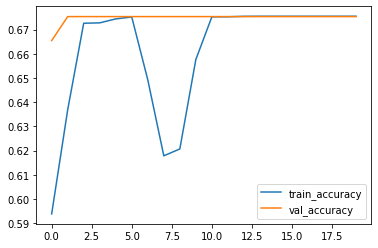

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 : Predict

In [15]:
# predictions = model.predict(x_test)
# predictions

## Use 'predict_classes' instead of 'predict'
predictions = model.predict_classes(x_test)
predictions

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int32)

## Step 9 : Evaluate the model

### 9.1 - Print out metrics

In [16]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions > 0.5)

0.6697838109602815

In [17]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(x_test, y_test, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.2f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 5.06
Metric : accuracy = 0.67


### 9.2 - Confussion Matrix
Since this is a classification problem, confusion matrix is very effective way to evaluate our model

In [18]:
## plain confusion matrix 

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions, labels = [0,1])
cm


array([[   0, 3284],
       [   0, 6661]])

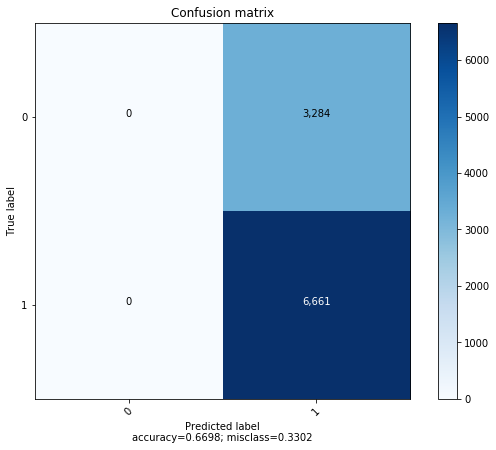

In [19]:
## Plot confusion matrix
import os
import sys
top_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))
if top_dir not in sys.path:
    sys.path.append(top_dir)

import my_utils

my_utils.plot_confusion_matrix(cm, target_names=[0,1], normalize=False)

### 9.3 - Metrics calculated from Confusion Matrix

In [20]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(y_test, predictions, output_dict=True))

{'0': {'f1-score': 0.0, 'precision': 0.0, 'recall': 0.0, 'support': 3284},
 '1': {'f1-score': 0.8022401541611466,
       'precision': 0.6697838109602815,
       'recall': 1.0,
       'support': 6661},
 'accuracy': 0.6697838109602815,
 'macro avg': {'f1-score': 0.4011200770805733,
               'precision': 0.33489190548014075,
               'recall': 0.5,
               'support': 9945},
 'weighted avg': {'f1-score': 0.5373274677594165,
                  'precision': 0.44861035342447814,
                  'recall': 0.6697838109602815,
                  'support': 9945}}


/home/ubuntu/apps/anaconda/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### TODO : Intepret confusion matrix
Instructor will walk you through the matrix.  
Answer these questions
- which class is classified correctly mostly
- which class is classified incorrectly?

## Step 10 : Improve the Model

Inspect the following
- What is the metric 'accuracy' in step 9.1
- And verify this with tensorboard (port 6066)

Most likely, we didn't get a great accuracy.  
How can we improve it?

**Try the following ideas** 

- **Idea-1 : Increase neurons in hidden layer**  
  - In Step-4, increase hidden layer neurons from 8 --> 64  
  - Click 'Kernel --> Restart and Run all Cells'  
  - Hopefully you should see improvement in the accuracy.  
  - Check  accuracy metrics / confusion matrix / tensorboard